In [1]:
import pandas as pd
import warnings
import nltk
import string
import re
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
toyota_rav4 = pd.read_csv("Review_list_test.csv")
toyota_rav4.head()

,Review,Date posted,Reference url
0,New one on Drive looks..interesting.Toyota's n...,2018-Mar-28,whrl.pl/Re7BHK
1,Looks pretty good aside from the wheelarch tre...,2018-Mar-28,whrl.pl/Re7BJK
2,"I saw the pics and was really, really surprise...",2018-Mar-28,whrl.pl/Re7BRz
3,"Looks great, the Hybrid of this is the only ca...",2018-Mar-28,whrl.pl/Re7B60
4,"Redair writes...Looks great, the Hybrid of thi...",2018-Mar-29,whrl.pl/Re7FeL


In [3]:
toyota_rav4.isna().sum()

Review           1
Date posted      0
Reference url    0
dtype: int64

In [4]:
toyota_rav4_updated = toyota_rav4.dropna()

In [5]:
toyota_rav4_updated.isna().sum()

Review           0
Date posted      0
Reference url    0
dtype: int64

In [6]:
warnings.filterwarnings('ignore')
def remove_URL(headline_text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', headline_text)

toyota_rav4_updated['clean'] = toyota_rav4_updated['Review'].apply(lambda x: remove_URL(x))
toyota_rav4_updated.head(20)

,Review,Date posted,Reference url,clean
0,New one on Drive looks..interesting.Toyota's n...,2018-Mar-28,whrl.pl/Re7BHK,New one on Drive looks..interesting.Toyota's n...
1,Looks pretty good aside from the wheelarch tre...,2018-Mar-28,whrl.pl/Re7BJK,Looks pretty good aside from the wheelarch tre...
2,"I saw the pics and was really, really surprise...",2018-Mar-28,whrl.pl/Re7BRz,"I saw the pics and was really, really surprise..."
3,"Looks great, the Hybrid of this is the only ca...",2018-Mar-28,whrl.pl/Re7B60,"Looks great, the Hybrid of this is the only ca..."
4,"Redair writes...Looks great, the Hybrid of thi...",2018-Mar-29,whrl.pl/Re7FeL,"Redair writes...Looks great, the Hybrid of thi..."
5,tannins writes...The 2.5 litre hybrid engine i...,2018-Mar-30,whrl.pl/Re7FkM,tannins writes...The 2.5 litre hybrid engine i...
6,It won't happen but I'd like a basic spec hybr...,2018-Apr-2,whrl.pl/Re7MOL,It won't happen but I'd like a basic spec hybr...
7,Anyone heard when it's going on sale in Austra...,2018-Jul-4,whrl.pl/RfbqXM,Anyone heard when it's going on sale in Austra...
8,individualist writes...Anyone heard when it's ...,2018-Jul-4,whrl.pl/Rfbrrw,individualist writes...Anyone heard when it's ...
9,If only they re-introduced a N/A V6 to the RAV...,2018-Jul-4,whrl.pl/Rfbrty,If only they re-introduced a N/A V6 to the RAV...


In [7]:
# from nltk.tokenize import RegexpTokenizer
# warnings.filterwarnings('ignore')
# def remove_punct(text):
#     token = RegexpTokenizer(r'\w+')
#     #regex expression to form tokens out of alphabetic sequence
#     text = token.tokenize(text)
#     text = ' '.join(text)
#     return text

# toyota_rav4_updated['no_punct'] = toyota_rav4_updated['clean'].apply(lambda x: remove_punct(x))
# toyota_rav4_updated.head(20)

In [8]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

toyota_rav4_updated['tokenized'] = toyota_rav4_updated['clean'].apply(lambda x: tokenization(x.lower()))
toyota_rav4_updated.head(10)

,Review,Date posted,Reference url,clean,tokenized
0,New one on Drive looks..interesting.Toyota's n...,2018-Mar-28,whrl.pl/Re7BHK,New one on Drive looks..interesting.Toyota's n...,"[new, one, on, drive, looks, interesting, toyo..."
1,Looks pretty good aside from the wheelarch tre...,2018-Mar-28,whrl.pl/Re7BJK,Looks pretty good aside from the wheelarch tre...,"[looks, pretty, good, aside, from, the, wheela..."
2,"I saw the pics and was really, really surprise...",2018-Mar-28,whrl.pl/Re7BRz,"I saw the pics and was really, really surprise...","[i, saw, the, pics, and, was, really, really, ..."
3,"Looks great, the Hybrid of this is the only ca...",2018-Mar-28,whrl.pl/Re7B60,"Looks great, the Hybrid of this is the only ca...","[looks, great, the, hybrid, of, this, is, the,..."
4,"Redair writes...Looks great, the Hybrid of thi...",2018-Mar-29,whrl.pl/Re7FeL,"Redair writes...Looks great, the Hybrid of thi...","[redair, writes, looks, great, the, hybrid, of..."
5,tannins writes...The 2.5 litre hybrid engine i...,2018-Mar-30,whrl.pl/Re7FkM,tannins writes...The 2.5 litre hybrid engine i...,"[tannins, writes, the, 2, 5, litre, hybrid, en..."
6,It won't happen but I'd like a basic spec hybr...,2018-Apr-2,whrl.pl/Re7MOL,It won't happen but I'd like a basic spec hybr...,"[it, won, t, happen, but, i, d, like, a, basic..."
7,Anyone heard when it's going on sale in Austra...,2018-Jul-4,whrl.pl/RfbqXM,Anyone heard when it's going on sale in Austra...,"[anyone, heard, when, it, s, going, on, sale, ..."
8,individualist writes...Anyone heard when it's ...,2018-Jul-4,whrl.pl/Rfbrrw,individualist writes...Anyone heard when it's ...,"[individualist, writes, anyone, heard, when, i..."
9,If only they re-introduced a N/A V6 to the RAV...,2018-Jul-4,whrl.pl/Rfbrty,If only they re-introduced a N/A V6 to the RAV...,"[if, only, they, re, introduced, a, n, a, v6, ..."


In [9]:
stopword = nltk.corpus.stopwords.words('english')

In [10]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

toyota_rav4_updated['no_stopwords'] = toyota_rav4_updated['tokenized'].apply(lambda x: remove_stopwords(x))
toyota_rav4_updated.head(10)

,Review,Date posted,Reference url,clean,tokenized,no_stopwords
0,New one on Drive looks..interesting.Toyota's n...,2018-Mar-28,whrl.pl/Re7BHK,New one on Drive looks..interesting.Toyota's n...,"[new, one, on, drive, looks, interesting, toyo...","[new, one, drive, looks, interesting, toyota, ..."
1,Looks pretty good aside from the wheelarch tre...,2018-Mar-28,whrl.pl/Re7BJK,Looks pretty good aside from the wheelarch tre...,"[looks, pretty, good, aside, from, the, wheela...","[looks, pretty, good, aside, wheelarch, treatm..."
2,"I saw the pics and was really, really surprise...",2018-Mar-28,whrl.pl/Re7BRz,"I saw the pics and was really, really surprise...","[i, saw, the, pics, and, was, really, really, ...","[saw, pics, really, really, surprised, directi..."
3,"Looks great, the Hybrid of this is the only ca...",2018-Mar-28,whrl.pl/Re7B60,"Looks great, the Hybrid of this is the only ca...","[looks, great, the, hybrid, of, this, is, the,...","[looks, great, hybrid, car, horizon, would, co..."
4,"Redair writes...Looks great, the Hybrid of thi...",2018-Mar-29,whrl.pl/Re7FeL,"Redair writes...Looks great, the Hybrid of thi...","[redair, writes, looks, great, the, hybrid, of...","[redair, writes, looks, great, hybrid, car, ho..."
5,tannins writes...The 2.5 litre hybrid engine i...,2018-Mar-30,whrl.pl/Re7FkM,tannins writes...The 2.5 litre hybrid engine i...,"[tannins, writes, the, 2, 5, litre, hybrid, en...","[tannins, writes, 2, 5, litre, hybrid, engine,..."
6,It won't happen but I'd like a basic spec hybr...,2018-Apr-2,whrl.pl/Re7MOL,It won't happen but I'd like a basic spec hybr...,"[it, won, t, happen, but, i, d, like, a, basic...","[happen, like, basic, spec, hybrid, moonroof, ..."
7,Anyone heard when it's going on sale in Austra...,2018-Jul-4,whrl.pl/RfbqXM,Anyone heard when it's going on sale in Austra...,"[anyone, heard, when, it, s, going, on, sale, ...","[anyone, heard, going, sale, australia, ]"
8,individualist writes...Anyone heard when it's ...,2018-Jul-4,whrl.pl/Rfbrrw,individualist writes...Anyone heard when it's ...,"[individualist, writes, anyone, heard, when, i...","[individualist, writes, anyone, heard, going, ..."
9,If only they re-introduced a N/A V6 to the RAV...,2018-Jul-4,whrl.pl/Rfbrty,If only they re-introduced a N/A V6 to the RAV...,"[if, only, they, re, introduced, a, n, a, v6, ...","[introduced, n, v6, rav4, lineup, like, 2018, ..."


In [11]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

toyota_rav4_updated['stemmed_review'] = toyota_rav4_updated['no_stopwords'].apply(lambda x: stemming(x))
toyota_rav4_updated.head(10)

,Review,Date posted,Reference url,clean,tokenized,no_stopwords,stemmed_review
0,New one on Drive looks..interesting.Toyota's n...,2018-Mar-28,whrl.pl/Re7BHK,New one on Drive looks..interesting.Toyota's n...,"[new, one, on, drive, looks, interesting, toyo...","[new, one, drive, looks, interesting, toyota, ...","[new, one, drive, look, interest, toyota, new,..."
1,Looks pretty good aside from the wheelarch tre...,2018-Mar-28,whrl.pl/Re7BJK,Looks pretty good aside from the wheelarch tre...,"[looks, pretty, good, aside, from, the, wheela...","[looks, pretty, good, aside, wheelarch, treatm...","[look, pretti, good, asid, wheelarch, treatmen..."
2,"I saw the pics and was really, really surprise...",2018-Mar-28,whrl.pl/Re7BRz,"I saw the pics and was really, really surprise...","[i, saw, the, pics, and, was, really, really, ...","[saw, pics, really, really, surprised, directi...","[saw, pic, realli, realli, surpris, direct, ki..."
3,"Looks great, the Hybrid of this is the only ca...",2018-Mar-28,whrl.pl/Re7B60,"Looks great, the Hybrid of this is the only ca...","[looks, great, the, hybrid, of, this, is, the,...","[looks, great, hybrid, car, horizon, would, co...","[look, great, hybrid, car, horizon, would, con..."
4,"Redair writes...Looks great, the Hybrid of thi...",2018-Mar-29,whrl.pl/Re7FeL,"Redair writes...Looks great, the Hybrid of thi...","[redair, writes, looks, great, the, hybrid, of...","[redair, writes, looks, great, hybrid, car, ho...","[redair, write, look, great, hybrid, car, hori..."
5,tannins writes...The 2.5 litre hybrid engine i...,2018-Mar-30,whrl.pl/Re7FkM,tannins writes...The 2.5 litre hybrid engine i...,"[tannins, writes, the, 2, 5, litre, hybrid, en...","[tannins, writes, 2, 5, litre, hybrid, engine,...","[tannin, write, 2, 5, litr, hybrid, engin, gre..."
6,It won't happen but I'd like a basic spec hybr...,2018-Apr-2,whrl.pl/Re7MOL,It won't happen but I'd like a basic spec hybr...,"[it, won, t, happen, but, i, d, like, a, basic...","[happen, like, basic, spec, hybrid, moonroof, ...","[happen, like, basic, spec, hybrid, moonroof, ..."
7,Anyone heard when it's going on sale in Austra...,2018-Jul-4,whrl.pl/RfbqXM,Anyone heard when it's going on sale in Austra...,"[anyone, heard, when, it, s, going, on, sale, ...","[anyone, heard, going, sale, australia, ]","[anyon, heard, go, sale, australia, ]"
8,individualist writes...Anyone heard when it's ...,2018-Jul-4,whrl.pl/Rfbrrw,individualist writes...Anyone heard when it's ...,"[individualist, writes, anyone, heard, when, i...","[individualist, writes, anyone, heard, going, ...","[individualist, write, anyon, heard, go, sale,..."
9,If only they re-introduced a N/A V6 to the RAV...,2018-Jul-4,whrl.pl/Rfbrty,If only they re-introduced a N/A V6 to the RAV...,"[if, only, they, re, introduced, a, n, a, v6, ...","[introduced, n, v6, rav4, lineup, like, 2018, ...","[introduc, n, v6, rav4, lineup, like, 2018, ca..."


In [12]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

toyota_rav4_updated['lemmatized_review'] = toyota_rav4_updated['no_stopwords'].apply(lambda x: lemmatizer(x))
toyota_rav4_updated.head(10)

,Review,Date posted,Reference url,clean,tokenized,no_stopwords,stemmed_review,lemmatized_review
0,New one on Drive looks..interesting.Toyota's n...,2018-Mar-28,whrl.pl/Re7BHK,New one on Drive looks..interesting.Toyota's n...,"[new, one, on, drive, looks, interesting, toyo...","[new, one, drive, looks, interesting, toyota, ...","[new, one, drive, look, interest, toyota, new,...","[new, one, drive, look, interesting, toyota, n..."
1,Looks pretty good aside from the wheelarch tre...,2018-Mar-28,whrl.pl/Re7BJK,Looks pretty good aside from the wheelarch tre...,"[looks, pretty, good, aside, from, the, wheela...","[looks, pretty, good, aside, wheelarch, treatm...","[look, pretti, good, asid, wheelarch, treatmen...","[look, pretty, good, aside, wheelarch, treatme..."
2,"I saw the pics and was really, really surprise...",2018-Mar-28,whrl.pl/Re7BRz,"I saw the pics and was really, really surprise...","[i, saw, the, pics, and, was, really, really, ...","[saw, pics, really, really, surprised, directi...","[saw, pic, realli, realli, surpris, direct, ki...","[saw, pic, really, really, surprised, directio..."
3,"Looks great, the Hybrid of this is the only ca...",2018-Mar-28,whrl.pl/Re7B60,"Looks great, the Hybrid of this is the only ca...","[looks, great, the, hybrid, of, this, is, the,...","[looks, great, hybrid, car, horizon, would, co...","[look, great, hybrid, car, horizon, would, con...","[look, great, hybrid, car, horizon, would, con..."
4,"Redair writes...Looks great, the Hybrid of thi...",2018-Mar-29,whrl.pl/Re7FeL,"Redair writes...Looks great, the Hybrid of thi...","[redair, writes, looks, great, the, hybrid, of...","[redair, writes, looks, great, hybrid, car, ho...","[redair, write, look, great, hybrid, car, hori...","[redair, writes, look, great, hybrid, car, hor..."
5,tannins writes...The 2.5 litre hybrid engine i...,2018-Mar-30,whrl.pl/Re7FkM,tannins writes...The 2.5 litre hybrid engine i...,"[tannins, writes, the, 2, 5, litre, hybrid, en...","[tannins, writes, 2, 5, litre, hybrid, engine,...","[tannin, write, 2, 5, litr, hybrid, engin, gre...","[tannin, writes, 2, 5, litre, hybrid, engine, ..."
6,It won't happen but I'd like a basic spec hybr...,2018-Apr-2,whrl.pl/Re7MOL,It won't happen but I'd like a basic spec hybr...,"[it, won, t, happen, but, i, d, like, a, basic...","[happen, like, basic, spec, hybrid, moonroof, ...","[happen, like, basic, spec, hybrid, moonroof, ...","[happen, like, basic, spec, hybrid, moonroof, ..."
7,Anyone heard when it's going on sale in Austra...,2018-Jul-4,whrl.pl/RfbqXM,Anyone heard when it's going on sale in Austra...,"[anyone, heard, when, it, s, going, on, sale, ...","[anyone, heard, going, sale, australia, ]","[anyon, heard, go, sale, australia, ]","[anyone, heard, going, sale, australia, ]"
8,individualist writes...Anyone heard when it's ...,2018-Jul-4,whrl.pl/Rfbrrw,individualist writes...Anyone heard when it's ...,"[individualist, writes, anyone, heard, when, i...","[individualist, writes, anyone, heard, going, ...","[individualist, write, anyon, heard, go, sale,...","[individualist, writes, anyone, heard, going, ..."
9,If only they re-introduced a N/A V6 to the RAV...,2018-Jul-4,whrl.pl/Rfbrty,If only they re-introduced a N/A V6 to the RAV...,"[if, only, they, re, introduced, a, n, a, v6, ...","[introduced, n, v6, rav4, lineup, like, 2018, ...","[introduc, n, v6, rav4, lineup, like, 2018, ca...","[introduced, n, v6, rav4, lineup, like, 2018, ..."


In [13]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [14]:
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(toyota_rav4_updated['Review'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))

7970 Number of reviews has 18335 words


In [15]:
toyota_rav4_updated['Review'][18]

'Rakddon writes...The 2019 Toyota Rav4 is similar to the 2019 Lexus UX. both being released early 2019.Except the UX is smaller and based on the C-HR.'

In [16]:
toyota_rav4_updated['lemmatized_review'][18]

['rakddon',
 'writes',
 '2019',
 'toyota',
 'rav4',
 'similar',
 '2019',
 'lexus',
 'ux',
 'released',
 'early',
 '2019',
 'except',
 'ux',
 'smaller',
 'based',
 'c',
 'hr',
 '']

In [17]:
text = " ".join(review for review in toyota_rav4_updated.lemmatized_review.astype(str))
print ("There are {} words in the combination of all cells in column lemmatized_reviews.".format(len(text)))

There are 2287894 words in the combination of all cells in column lemmatized_reviews.


In [18]:

wordcloud = WordCloud(stopwords=stopword, background_color="white", width=800, height=400).generate(text)

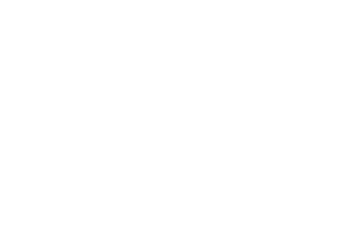

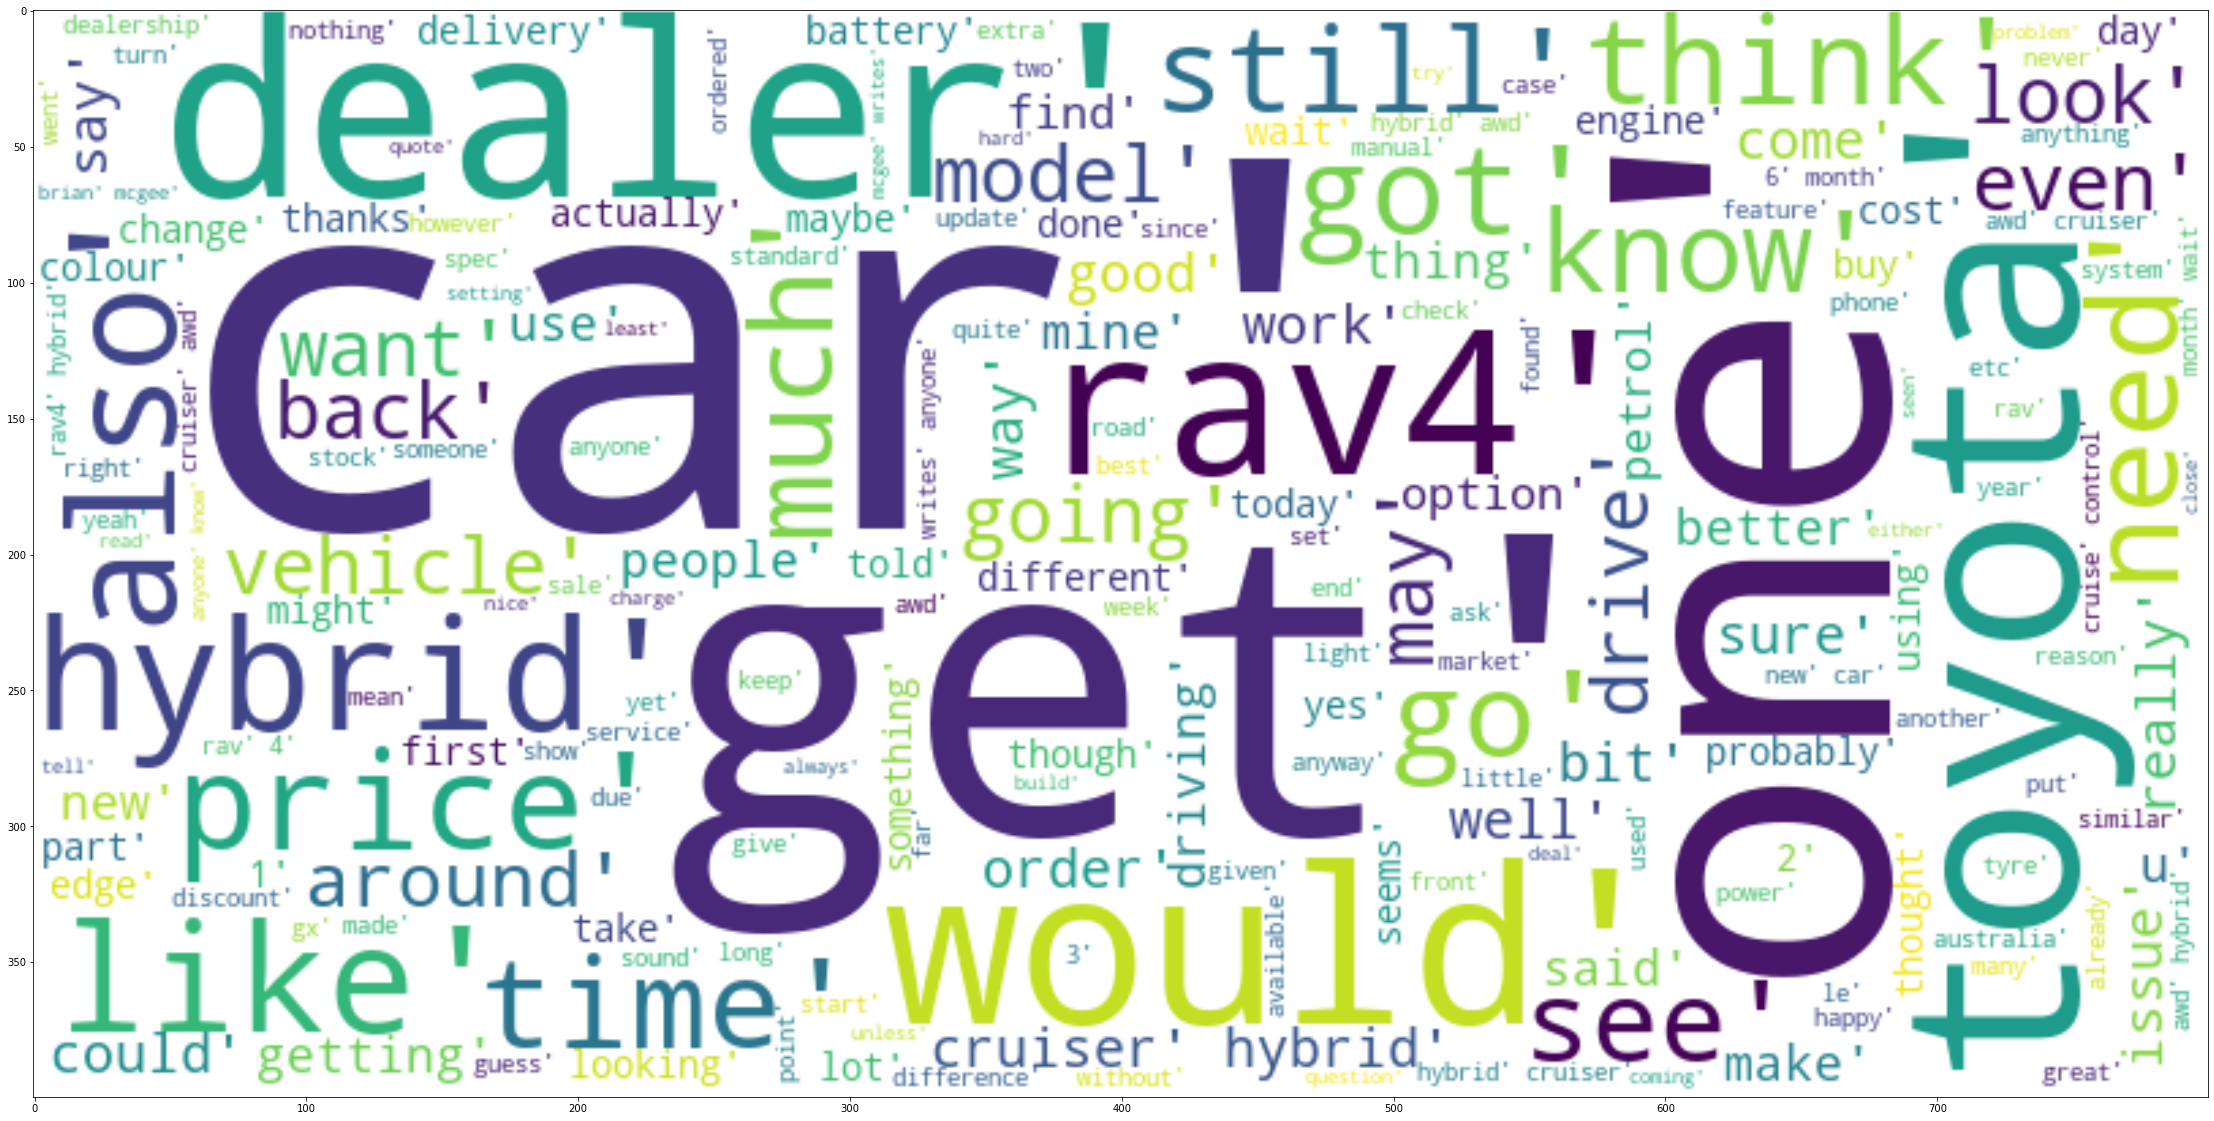

In [19]:
import matplotlib.pyplot as plt
plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [20]:
stopwords = set(STOPWORDS)
comment_words = ' '
for val in toyota_rav4_updated['lemmatized_review']:
 
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
 
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
 
    for words in tokens:
        comment_words = comment_words + words + ' '
 
wordcloud_2 = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)

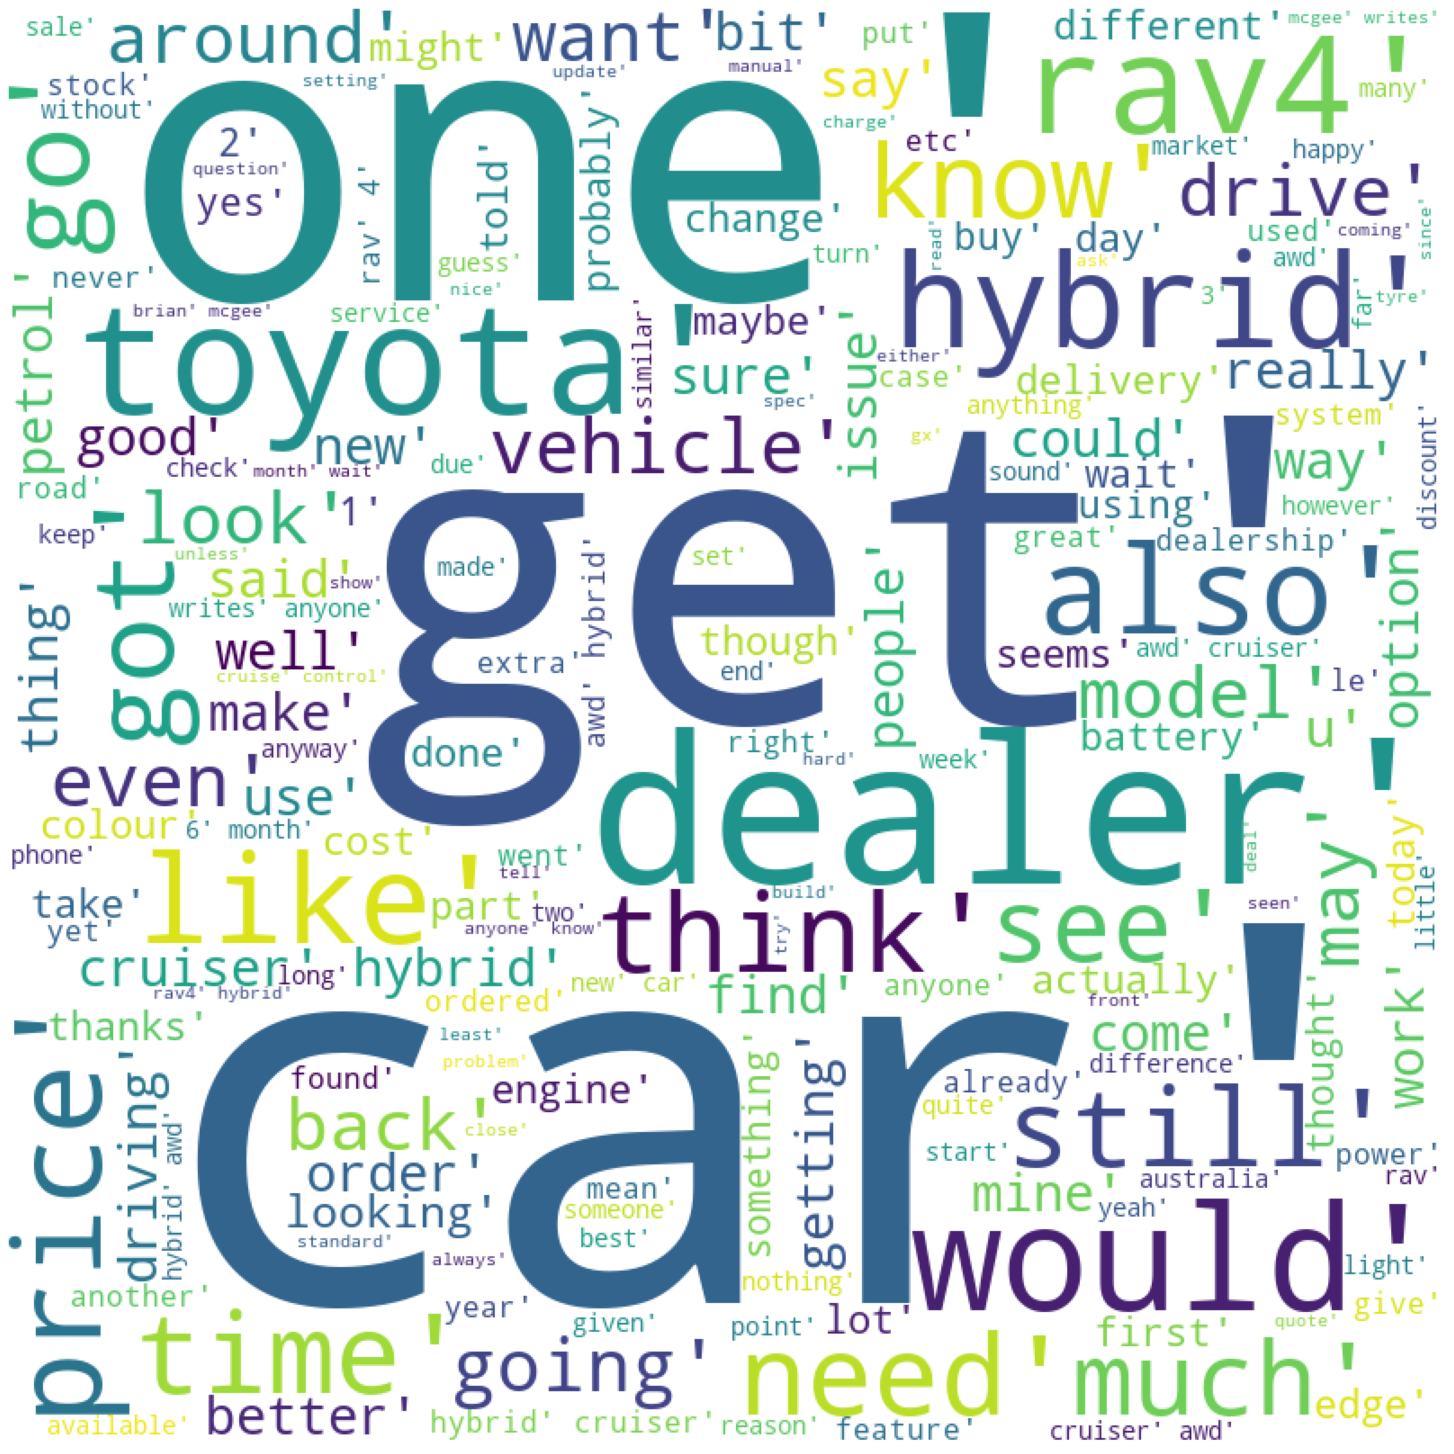

In [21]:
# plot the WordCloud image
plt.figure(figsize=(40,20), facecolor=None)
plt.imshow(wordcloud_2)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

(7970, 8)